In [13]:
import pandas as pd
import matplotlib as plt

In [2]:
df = pd.read_csv('firearm_incidents.csv')

In [8]:
combinedDF = df.groupby(['state_name','county_name'])['n_total'].count()

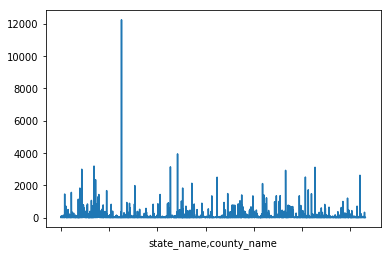

In [15]:
combinedDF.plot()

In [21]:
combinedDF

state_name  county_name
Alabama     Alpine           2
            Autauga         39
            Baldwin         85
            Barbour         20
            Bibb             8
            Blount          20
            Bullock         18
            Butler          26
            Calhoun         95
            Chambers        27
            Cherokee        14
            Chilton         21
            Choctaw          7
            Clarke           2
            Clay             3
            Cleburne         7
            Coffee          34
            Colbert         39
            Columbus         1
            Conecuh          3
            Coosa            7
            Covington       20
            Crenshaw         9
            Cullman         32
            Dale            28
            Dallas         146
            DeKalb          38
            Dekalb           2
            Elmore          46
            Escambia        28
                          ... 
Wisconsin   Tre

In [22]:
combinedDF.to_csv('temp.csv')

In [23]:
county_level = pd.read_csv('temp.csv')

In [25]:
state_level = pd.read_csv('states2014.csv')

In [28]:
county_level.head()

,State,County,n_incidents
0,Alabama,Alpine,2
1,Alabama,Autauga,39
2,Alabama,Baldwin,85
3,Alabama,Barbour,20
4,Alabama,Bibb,8


In [29]:
county_level = pd.merge(county_level, state_level, how='left', left_on=['State'], right_on = ['state'])

In [33]:
county_level = county_level[['State','County','n_incidents_x','lawtotal']]
county_level.head()

,State,County,n_incidents_x,lawtotal
0,Alabama,Alpine,2,10
1,Alabama,Autauga,39,10
2,Alabama,Baldwin,85,10
3,Alabama,Barbour,20,10
4,Alabama,Bibb,8,10


In [34]:
poverty = pd.read_csv('county_poverty_avg.csv')

In [36]:
poverty = poverty[['Region Name','Region Code','average']]
poverty.head()

,Region Name,Region Code,average
0,"Abbeville County, SC",45001,15.6
1,"Acadia Parish, LA",22001,19.6
2,"Accomack County, VA",51001,15.8
3,"Ada County, ID",16001,10.1
4,"Adair County, OK",40001,24.0


In [37]:
states = pd.read_csv('states.csv')

In [38]:
states.head()

,id,state
0,AK,Alaska
1,AL,Alabama
2,AR,Arkansas
3,AZ,Arizona
4,CA,California


In [40]:
county_level = pd.merge(county_level,states, how='left', left_on=['State'], right_on = ['state'])
county_level.head()

,State,County,n_incidents_x,lawtotal,id,state
0,Alabama,Alpine,2,10,AL,Alabama
1,Alabama,Autauga,39,10,AL,Alabama
2,Alabama,Baldwin,85,10,AL,Alabama
3,Alabama,Barbour,20,10,AL,Alabama
4,Alabama,Bibb,8,10,AL,Alabama


In [41]:
county_level = county_level[['State','County','n_incidents_x','id', 'lawtotal']]
county_level.head()

,State,County,n_incidents_x,id,lawtotal
0,Alabama,Alpine,2,AL,10
1,Alabama,Autauga,39,AL,10
2,Alabama,Baldwin,85,AL,10
3,Alabama,Barbour,20,AL,10
4,Alabama,Bibb,8,AL,10


In [47]:
poverty['state_id'] = poverty['Region Name'].str[-2:]
poverty

C:\Users\Oleg\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Region Name,Region Code,average,state_id
0,"Abbeville County, SC",45001,15.6,SC
1,"Acadia Parish, LA",22001,19.6,LA
2,"Accomack County, VA",51001,15.8,VA
3,"Ada County, ID",16001,10.1,ID
4,"Adair County, OK",40001,24.0,OK
5,"Adair County, KY",21001,20.5,KY
6,"Adair County, MO",29001,20.8,MO
7,"Adair County, IA",19001,8.5,IA
8,"Adams County, WI",55001,13.1,WI
9,"Adams County, IN",18001,12.3,IN


In [48]:
poverty['Region Name'] = poverty['Region Name'].str[:-4]
poverty.head()

C:\Users\Oleg\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Region Name,Region Code,average,state_id
0,Abbeville County,45001,15.6,SC
1,Acadia Parish,22001,19.6,LA
2,Accomack County,51001,15.8,VA
3,Ada County,16001,10.1,ID
4,Adair County,40001,24.0,OK


In [57]:
county_part = poverty[poverty['Region Name'].str.contains('County')]

In [58]:
county_part.count()

Region Name    3006
Region Code    3006
average        3006
state_id       3006
dtype: int64

In [54]:
poverty.count()

Region Name    3141
Region Code    3141
average        3141
state_id       3141
dtype: int64

In [59]:
county_part.head()

,Region Name,Region Code,average,state_id
0,Abbeville County,45001,15.6,SC
2,Accomack County,51001,15.8,VA
3,Ada County,16001,10.1,ID
4,Adair County,40001,24.0,OK
5,Adair County,21001,20.5,KY


In [60]:
county_part['Region Name'] = county_part['Region Name'].str[:-7]
county_part

C:\Users\Oleg\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Region Name,Region Code,average,state_id
0,Abbeville,45001,15.6,SC
2,Accomack,51001,15.8,VA
3,Ada,16001,10.1,ID
4,Adair,40001,24.0,OK
5,Adair,21001,20.5,KY
6,Adair,29001,20.8,MO
7,Adair,19001,8.5,IA
8,Adams,55001,13.1,WI
9,Adams,18001,12.3,IN
10,Adams,8001,10.7,CO


In [61]:
no_county_part = pd.read_csv('no_county.csv')

In [63]:
no_county_part.head()

,Region Name,Region Code,average,state_id
0,Acadia,22001,19.6,LA
1,Aleutians,2013,11.9,AK
2,Aleutians,2016,6.7,AK
3,Alexandria,51510,8.3,VA
4,Allen,22003,16.8,LA


In [64]:
poverty = pd.concat([county_part, no_county_part])

In [65]:
poverty.count()

Region Name    3141
Region Code    3141
average        3141
state_id       3141
dtype: int64

In [68]:
poverty.rename(columns={"average": "poverty"}, inplace=True)
poverty.head()

,Region Name,Region Code,poverty,state_id
0,Abbeville,45001,15.6,SC
2,Accomack,51001,15.8,VA
3,Ada,16001,10.1,ID
4,Adair,40001,24.0,OK
5,Adair,21001,20.5,KY


In [69]:
county_level.head()

,State,County,n_incidents_x,id,lawtotal
0,Alabama,Alpine,2,AL,10
1,Alabama,Autauga,39,AL,10
2,Alabama,Baldwin,85,AL,10
3,Alabama,Barbour,20,AL,10
4,Alabama,Bibb,8,AL,10


In [70]:
county_level1 = pd.merge(county_level, poverty, how='left', left_on=['id','County'], right_on = ['state_id','Region Name'])
county_level1.head()

,State,County,n_incidents_x,id,lawtotal,Region Name,Region Code,poverty,state_id
0,Alabama,Alpine,2,AL,10,NaN,NaN,NaN,NaN
1,Alabama,Autauga,39,AL,10,Autauga,1001.0,10.8,AL
2,Alabama,Baldwin,85,AL,10,Baldwin,1003.0,10.0,AL
3,Alabama,Barbour,20,AL,10,Barbour,1005.0,24.9,AL
4,Alabama,Bibb,8,AL,10,Bibb,1007.0,15.6,AL


In [72]:
poverty.count()

Region Name    3141
Region Code    3141
poverty        3141
state_id       3141
dtype: int64

In [74]:
county_level.count()

State            3156
County           3156
n_incidents_x    3156
id               3156
lawtotal         3156
dtype: int64

In [77]:
county_level1.dropna(inplace=True)
county_level1.count()

State            2763
County           2763
n_incidents_x    2763
id               2763
lawtotal         2763
Region Name      2763
Region Code      2763
poverty          2763
state_id         2763
dtype: int64

In [78]:
firearms = pd.read_csv('firearm_agencies.csv')
firearms.head()

,Unnamed: 0,city,state_id,state_name,county_name
0,0,Wasilla,AK,Alaska,Matanuska-Susitna
1,1,Wasilla,AK,Alaska,Matanuska-Susitna
2,2,Anchorage,AK,Alaska,Anchorage
3,4,Anchorage,AK,Alaska,Anchorage
4,5,Anchorage,AK,Alaska,Anchorage


In [79]:
fire_group = firearms.groupby(['state_id','county_name']).count()

In [81]:
fire_group.to_csv('fire_group.csv')

In [84]:
fire_group = pd.read_csv('fire_group.csv', encoding = "ISO-8859-1")
fire_group.head()

,state_id,county_name,amount
0,AK,Aleutians East,4
1,AK,Aleutians West,1
2,AK,Anchorage,166
3,AK,Bethel,20
4,AK,Bristol Bay,4


In [85]:
county_level2 = pd.merge(county_level1, fire_group, how='left', left_on=['id','County'], right_on = ['state_id','county_name'])

In [87]:
county_level2.count()

State            2763
County           2763
n_incidents_x    2763
id               2763
lawtotal         2763
Region Name      2763
Region Code      2763
poverty          2763
state_id_x       2763
state_id_y       2729
county_name      2729
amount           2729
dtype: int64

In [88]:
county_level2.dropna(inplace=True)

In [90]:
county_level2.rename(columns={"amount": "n_agency"}, inplace=True)
poverty.head()

,Region Name,Region Code,poverty,state_id
0,Abbeville,45001,15.6,SC
2,Accomack,51001,15.8,VA
3,Ada,16001,10.1,ID
4,Adair,40001,24.0,OK
5,Adair,21001,20.5,KY


In [91]:
county_level2.head()

,State,County,n_incidents_x,id,lawtotal,Region Name,Region Code,poverty,state_id_x,state_id_y,county_name,n_agency
0,Alabama,Autauga,39,AL,10,Autauga,1001.0,10.8,AL,AL,Autauga,19.0
1,Alabama,Baldwin,85,AL,10,Baldwin,1003.0,10.0,AL,AL,Baldwin,60.0
2,Alabama,Barbour,20,AL,10,Barbour,1005.0,24.9,AL,AL,Barbour,9.0
3,Alabama,Bibb,8,AL,10,Bibb,1007.0,15.6,AL,AL,Bibb,3.0
4,Alabama,Blount,20,AL,10,Blount,1009.0,12.1,AL,AL,Blount,15.0


In [92]:
county_level2.count()

State            2729
County           2729
n_incidents_x    2729
id               2729
lawtotal         2729
Region Name      2729
Region Code      2729
poverty          2729
state_id_x       2729
state_id_y       2729
county_name      2729
n_agency         2729
dtype: int64

In [94]:
population_count = pd.read_csv('population_county.csv', encoding = "ISO-8859-1")

In [98]:
population_count['CTYNAME'] = population_count['CTYNAME'].str[:-7]
population_count

,STNAME,CTYNAME,POPESTIMATE2015
0,Alabama,,4853160
1,Alabama,Autauga,54838
2,Alabama,Baldwin,202995
3,Alabama,Barbour,26294
4,Alabama,Bibb,22562
5,Alabama,Blount,57522
6,Alabama,Bullock,10400
7,Alabama,Butler,20176
8,Alabama,Calhoun,115536
9,Alabama,Chambers,34007


In [99]:
county_level3 = pd.merge(county_level2, population_count, how='left', left_on=['State','County'], right_on = ['STNAME','CTYNAME'])

In [101]:
county_level3.dropna(inplace=True)
county_level3.count()

State              2707
County             2707
n_incidents_x      2707
id                 2707
lawtotal           2707
Region Name        2707
Region Code        2707
poverty            2707
state_id_x         2707
state_id_y         2707
county_name        2707
n_agency           2707
STNAME             2707
CTYNAME            2707
POPESTIMATE2015    2707
dtype: int64

In [104]:
demog = pd.read_csv('demog.csv', encoding = "ISO-8859-1")

In [105]:
demog.head()

,SUMLEV,STATE,COUNTY,STNAME,CTYNAME,YEAR,AGEGRP,TOT_POP,TOT_MALE,TOT_FEMALE,...,HWAC_MALE,HWAC_FEMALE,HBAC_MALE,HBAC_FEMALE,HIAC_MALE,HIAC_FEMALE,HAAC_MALE,HAAC_FEMALE,HNAC_MALE,HNAC_FEMALE
0,50,1,1,Alabama,Autauga County,1,0,54571,26569,28002,...,607,538,57,48,26,32,9,11,19,10
1,50,1,1,Alabama,Autauga County,1,1,3579,1866,1713,...,77,56,9,5,4,1,0,0,2,1
2,50,1,1,Alabama,Autauga County,1,2,3991,2001,1990,...,64,66,2,3,2,7,2,3,2,0
3,50,1,1,Alabama,Autauga County,1,3,4290,2171,2119,...,51,57,13,7,5,5,2,1,1,1
4,50,1,1,Alabama,Autauga County,1,4,4290,2213,2077,...,48,44,7,5,0,2,2,1,3,1


In [107]:
demog = demog.loc[demog['AGEGRP'] == 0]
demog.head()

,SUMLEV,STATE,COUNTY,STNAME,CTYNAME,YEAR,AGEGRP,TOT_POP,TOT_MALE,TOT_FEMALE,...,HWAC_MALE,HWAC_FEMALE,HBAC_MALE,HBAC_FEMALE,HIAC_MALE,HIAC_FEMALE,HAAC_MALE,HAAC_FEMALE,HNAC_MALE,HNAC_FEMALE
0,50,1,1,Alabama,Autauga County,1,0,54571,26569,28002,...,607,538,57,48,26,32,9,11,19,10
19,50,1,1,Alabama,Autauga County,2,0,54571,26569,28002,...,607,538,57,48,26,32,9,11,19,10
38,50,1,1,Alabama,Autauga County,3,0,54660,26618,28042,...,616,548,60,46,21,28,13,10,19,11
57,50,1,1,Alabama,Autauga County,4,0,55253,26999,28254,...,628,568,57,49,28,33,11,13,18,9
76,50,1,1,Alabama,Autauga County,5,0,55175,26905,28270,...,630,574,68,44,29,30,12,12,24,6


In [108]:
demog = demog.loc[demog['YEAR'] == 8]
demog.head()

,SUMLEV,STATE,COUNTY,STNAME,CTYNAME,YEAR,AGEGRP,TOT_POP,TOT_MALE,TOT_FEMALE,...,HWAC_MALE,HWAC_FEMALE,HBAC_MALE,HBAC_FEMALE,HIAC_MALE,HIAC_FEMALE,HAAC_MALE,HAAC_FEMALE,HNAC_MALE,HNAC_FEMALE
133,50,1,1,Alabama,Autauga County,8,0,55347,26857,28490,...,709,674,88,70,41,35,14,20,19,14
285,50,1,3,Alabama,Baldwin County,8,0,203709,99286,104423,...,4572,4098,264,241,191,159,48,47,37,34
437,50,1,5,Alabama,Barbour County,8,0,26489,14148,12341,...,553,391,63,57,62,34,0,2,14,11
589,50,1,7,Alabama,Bibb County,8,0,22583,12170,10413,...,282,191,30,22,11,8,3,2,20,3
741,50,1,9,Alabama,Blount County,8,0,57673,28495,29178,...,2693,2227,79,57,56,86,10,15,30,21


In [109]:
demog = demog[['STNAME','CTYNAME','TOT_POP', 'TOT_MALE', 'TOT_FEMALE', 'WA_MALE', 'WA_FEMALE', 'BA_MALE', 'BA_FEMALE', 
         'IA_MALE', 'IA_FEMALE', 'AA_MALE', 'AA_FEMALE', 'H_MALE', 'H_FEMALE']]
demog

,STNAME,CTYNAME,TOT_POP,TOT_MALE,TOT_FEMALE,WA_MALE,WA_FEMALE,BA_MALE,BA_FEMALE,IA_MALE,IA_FEMALE,AA_MALE,AA_FEMALE,H_MALE,H_FEMALE
133,Alabama,Autauga County,55347,26857,28490,20925,21840,5003,5601,121,146,276,388,816,757
285,Alabama,Baldwin County,203709,99286,104423,86524,90838,9477,9954,740,765,852,1055,4873,4395
437,Alabama,Barbour County,26489,14148,12341,7099,6176,6728,5910,90,63,57,61,680,492
589,Alabama,Bibb County,22583,12170,10413,8863,8316,3117,1900,45,51,19,33,328,216
741,Alabama,Blount County,57673,28495,29178,27308,27926,596,488,174,203,65,99,2826,2338
893,Alabama,Bullock County,10696,5857,4839,1797,1109,3898,3585,41,49,12,13,442,363
1045,Alabama,Butler County,20154,9371,10783,5157,5636,4003,4921,34,37,97,103,127,109
1197,Alabama,Calhoun County,115620,55755,59865,42610,44760,11312,13174,332,279,437,587,2263,1916
1349,Alabama,Chambers County,34123,16340,17783,9574,10174,6328,7236,45,47,193,131,410,281
1501,Alabama,Cherokee County,25859,12839,13020,11897,12060,614,609,86,67,25,47,201,197


In [110]:
demog['CTYNAME'] = demog['CTYNAME'].str[:-7]
demog

,STNAME,CTYNAME,TOT_POP,TOT_MALE,TOT_FEMALE,WA_MALE,WA_FEMALE,BA_MALE,BA_FEMALE,IA_MALE,IA_FEMALE,AA_MALE,AA_FEMALE,H_MALE,H_FEMALE
133,Alabama,Autauga,55347,26857,28490,20925,21840,5003,5601,121,146,276,388,816,757
285,Alabama,Baldwin,203709,99286,104423,86524,90838,9477,9954,740,765,852,1055,4873,4395
437,Alabama,Barbour,26489,14148,12341,7099,6176,6728,5910,90,63,57,61,680,492
589,Alabama,Bibb,22583,12170,10413,8863,8316,3117,1900,45,51,19,33,328,216
741,Alabama,Blount,57673,28495,29178,27308,27926,596,488,174,203,65,99,2826,2338
893,Alabama,Bullock,10696,5857,4839,1797,1109,3898,3585,41,49,12,13,442,363
1045,Alabama,Butler,20154,9371,10783,5157,5636,4003,4921,34,37,97,103,127,109
1197,Alabama,Calhoun,115620,55755,59865,42610,44760,11312,13174,332,279,437,587,2263,1916
1349,Alabama,Chambers,34123,16340,17783,9574,10174,6328,7236,45,47,193,131,410,281
1501,Alabama,Cherokee,25859,12839,13020,11897,12060,614,609,86,67,25,47,201,197


In [111]:
county_level4 = pd.merge(county_level3, demog, how='left', left_on=['State','County'], right_on = ['STNAME','CTYNAME'])
county_level4

,State,County,n_incidents_x,id,lawtotal,Region Name,Region Code,poverty,state_id_x,state_id_y,...,WA_MALE,WA_FEMALE,BA_MALE,BA_FEMALE,IA_MALE,IA_FEMALE,AA_MALE,AA_FEMALE,H_MALE,H_FEMALE
0,Alabama,Autauga,39,AL,10,Autauga,1001.0,10.8,AL,AL,...,20925,21840,5003,5601,121,146,276,388,816,757
1,Alabama,Baldwin,85,AL,10,Baldwin,1003.0,10.0,AL,AL,...,86524,90838,9477,9954,740,765,852,1055,4873,4395
2,Alabama,Barbour,20,AL,10,Barbour,1005.0,24.9,AL,AL,...,7099,6176,6728,5910,90,63,57,61,680,492
3,Alabama,Bibb,8,AL,10,Bibb,1007.0,15.6,AL,AL,...,8863,8316,3117,1900,45,51,19,33,328,216
4,Alabama,Blount,20,AL,10,Blount,1009.0,12.1,AL,AL,...,27308,27926,596,488,174,203,65,99,2826,2338
5,Alabama,Bullock,18,AL,10,Bullock,1011.0,27.8,AL,AL,...,1797,1109,3898,3585,41,49,12,13,442,363
6,Alabama,Butler,26,AL,10,Butler,1013.0,19.6,AL,AL,...,5157,5636,4003,4921,34,37,97,103,127,109
7,Alabama,Calhoun,95,AL,10,Calhoun,1015.0,16.3,AL,AL,...,42610,44760,11312,13174,332,279,437,587,2263,1916
8,Alabama,Chambers,27,AL,10,Chambers,1017.0,16.4,AL,AL,...,9574,10174,6328,7236,45,47,193,131,410,281
9,Alabama,Cherokee,14,AL,10,Cherokee,1019.0,14.3,AL,AL,...,11897,12060,614,609,86,67,25,47,201,197


In [112]:
county_level4.count()

State              2707
County             2707
n_incidents_x      2707
id                 2707
lawtotal           2707
Region Name        2707
Region Code        2707
poverty            2707
state_id_x         2707
state_id_y         2707
county_name        2707
n_agency           2707
STNAME_x           2707
CTYNAME_x          2707
POPESTIMATE2015    2707
STNAME_y           2707
CTYNAME_y          2707
TOT_POP            2707
TOT_MALE           2707
TOT_FEMALE         2707
WA_MALE            2707
WA_FEMALE          2707
BA_MALE            2707
BA_FEMALE          2707
IA_MALE            2707
IA_FEMALE          2707
AA_MALE            2707
AA_FEMALE          2707
H_MALE             2707
H_FEMALE           2707
dtype: int64

In [113]:
county_level4.to_csv('data_by_county.csv')